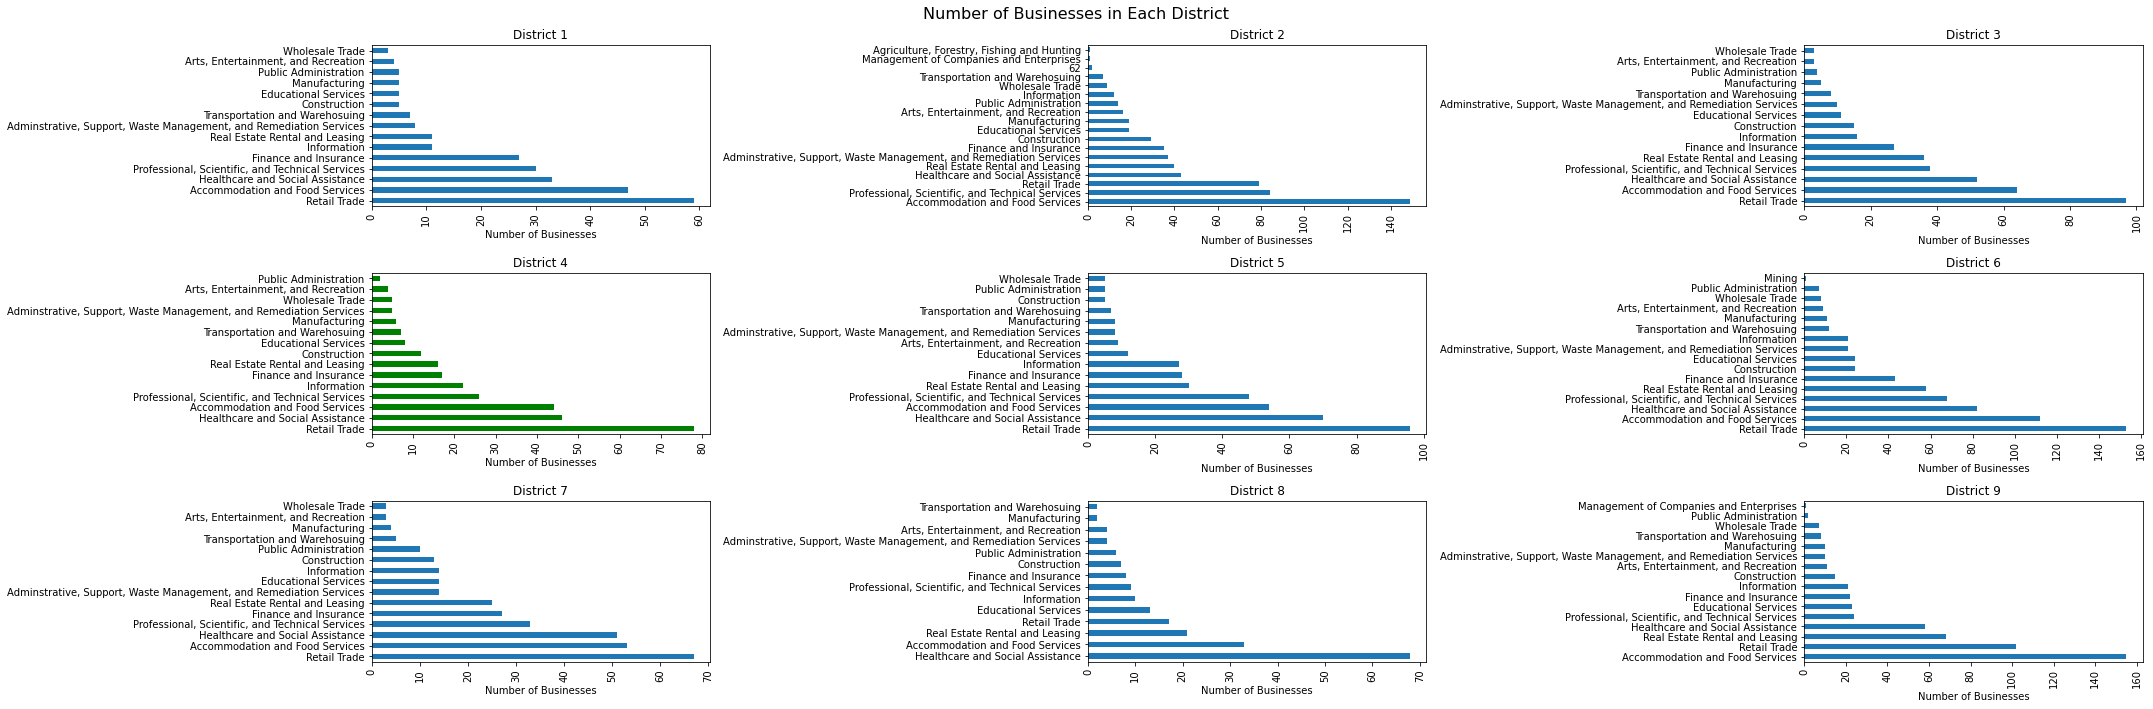

In [90]:
#answering the question of makeup of the businesses within district 4 compared to other
#districts (eg: the top districts by foot traffic has a lot more restaurants 
#than district 4, so maybe district 4 needs more restaurants)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
#import the MainStreets_Businesses.csv file as a dataframe
businesses = pd.read_csv('./businesses.csv')

#print the first 5 rows of the dataframe
businesses.head()

#go through each district and count the number of businesses in each district, erase the Undefined and Other Services
for district in range(1,10):
    district = businesses[businesses['district'] == district]
    district = district[district['NAICS_2017_2digit_desc'] != 'Undefined']
    district = district[district['NAICS_2017_2digit_desc'] != 'Other Services']

    #sort the business types in alphabetical order based on the first letter of the business type
    district = district.sort_values(by=['NAICS_2017_2digit_desc'])
    
    #make a subplot to hold each district's bar chart, make the subplot larger to fit the labels
    plt.subplot(3,3,district['district'].iloc[0])

    #plot the bar chart of the number of businesses in each district, rotate the chart 90 degrees the y axis is the business type, make the bars for district 4 green
    if district['district'].iloc[0] == 4:
        district['NAICS_2017_2digit_desc'].value_counts().plot(color = 'green', kind='barh', title='District ' + str(district['district'].iloc[0]))
    else:
        district['NAICS_2017_2digit_desc'].value_counts().plot(kind='barh', title='District ' + str(district['district'].iloc[0]))
    plt.xticks(rotation=90)

    #set the x and y axis labels
    plt.xlabel('Number of Businesses')

#title the figure 
plt.suptitle('Number of Businesses in Each District', fontsize=16)

#show the plot
plt.tight_layout()
plt.show()

